In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
db = dm.read_db(base='prices_global.pkl', add=['prices_kr.pkl'])
db_kr = dm.read_db(base='prices_kr.pkl', add=['prices_global.pkl'])

# Global multiasset model

In [144]:
gmm = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], #[1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12], #
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_HY', #'ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)

HBox(children=(IntProgress(value=0, max=130), HTML(value='')))


34.802377223968506


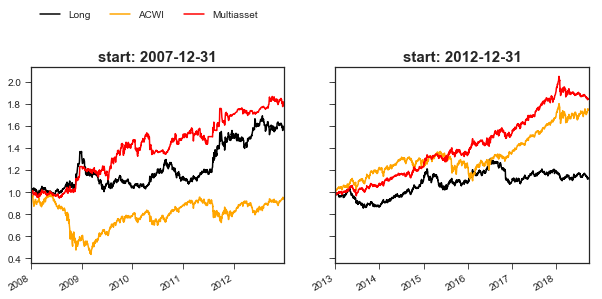

In [145]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

gmm.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

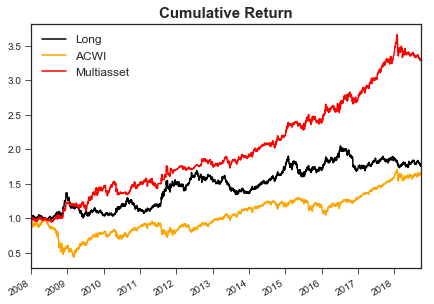

In [5]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

gmm.plot_cum(strats, names=names, color=color, logy=False)

In [1053]:
rt = gmm.cum.DualMomentum.resample('M').ffill().pct_change()
rt[rt<-0.05]

2009-04-30   -0.058353
2010-05-31   -0.084360
2018-02-28   -0.051543
Name: DualMomentum, dtype: float64

In [146]:
gmm.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_MBS,1.39,2708,3.09,3.42,0.90,-4.81,3.30,2.69,1.22,-0.02,16.43,67.97,1.26,77.75
BND_EmSov_loc,1.20,2708,1.71,10.99,0.16,-32.01,3.83,10.19,0.34,0.28,42.78,60.94,0.76,-2.42
BaseMetal,0.78,2708,-2.30,24.51,-0.09,-59.81,-3.01,18.31,-0.16,0.57,52.99,53.91,0.88,17.53
BND_GlobalSov_loc,1.18,2708,1.54,8.75,0.18,-16.86,1.33,7.84,0.17,0.11,40.75,57.81,0.88,10.38
DualMomentum,3.30,2708,11.66,12.31,0.95,-12.79,12.85,11.57,1.06,0.10,0.37,58.59,1.72,97.88


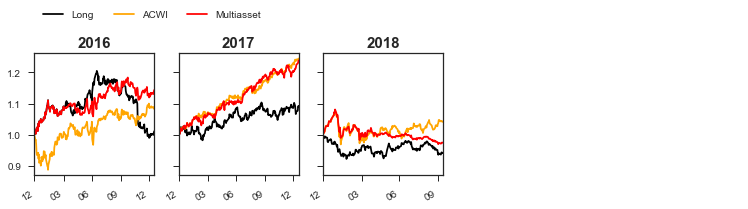

In [1055]:
gmm.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

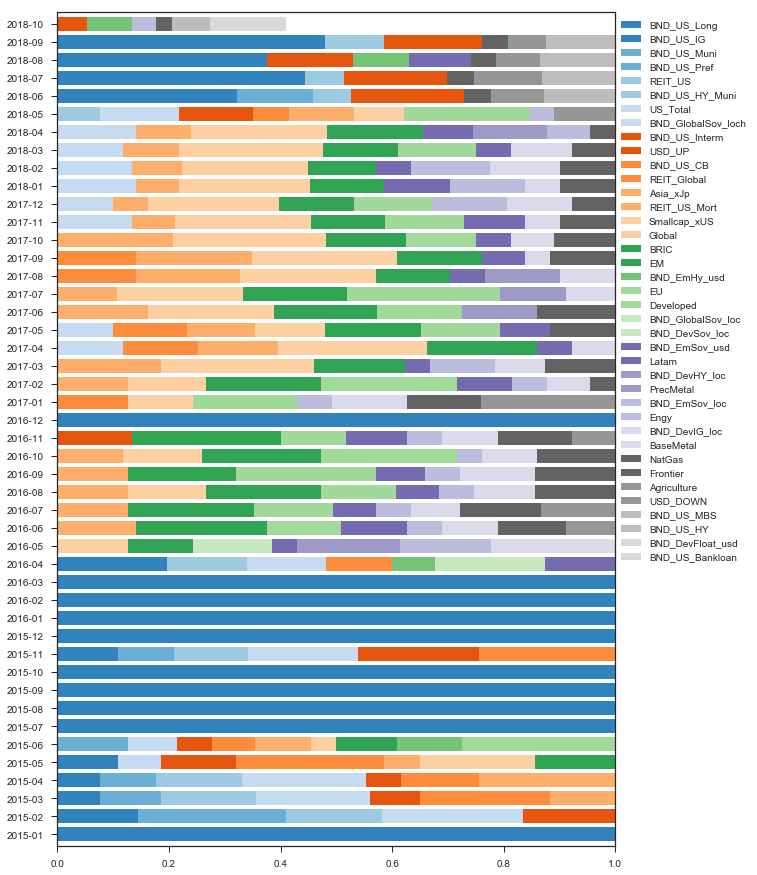

In [1056]:
gmm.plot_weight([2015, 2018])

# Korea-US allocation model

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [138]:
kuam = q.Backtester(
    setting.base_params(db), 
    w_type='adaptive', 
    rebal_style='cum', 
    n_picks=3, 
    assets={'Momentum', 'KTB10YL', 'BND_US_Long_krw', 'Momentum_kr', 'REIT_US'},  
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    #trade_assets=[('US', {'US_lev':0.5})], 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)

HBox(children=(IntProgress(value=0, max=130), HTML(value='')))


16.652098178863525


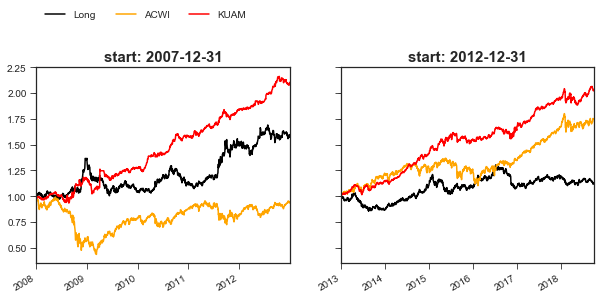

In [139]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'KUAM']
color = ['k', 'orange', 'r']

kuam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

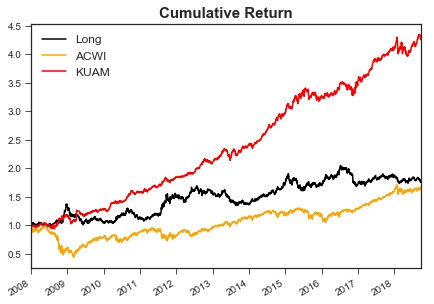

In [140]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'KUAM']
color = ['k', 'orange', 'r']

kuam.plot_cum(strats, names=names, color=color, logy=False)

In [141]:
kuam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Momentum_kr,3.69,1698,21.20,19.38,1.09,-35.89,26.09,18.63,1.33,0.21,24.98,67.09,1.21,80.16
Momentum,2.89,2708,10.29,19.88,0.52,-55.26,17.22,15.37,1.20,0.84,8.87,63.28,1.01,50.11
BND_US_Tbill,1.03,2708,0.32,0.57,0.55,-0.78,-0.02,0.26,-0.08,-0.00,54.82,54.69,2.49,-274.08
KTB10YL,2.55,2708,9.05,10.82,0.84,-18.34,12.38,8.96,1.21,-0.04,26.19,64.06,1.16,91.36
DualMomentum,4.28,2708,14.38,9.54,1.51,-13.67,15.43,7.70,1.94,0.10,0.00,72.66,1.34,98.64


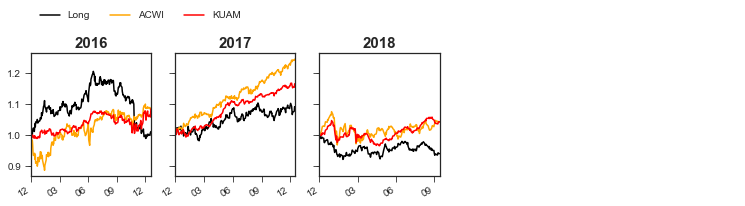

In [142]:
kuam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

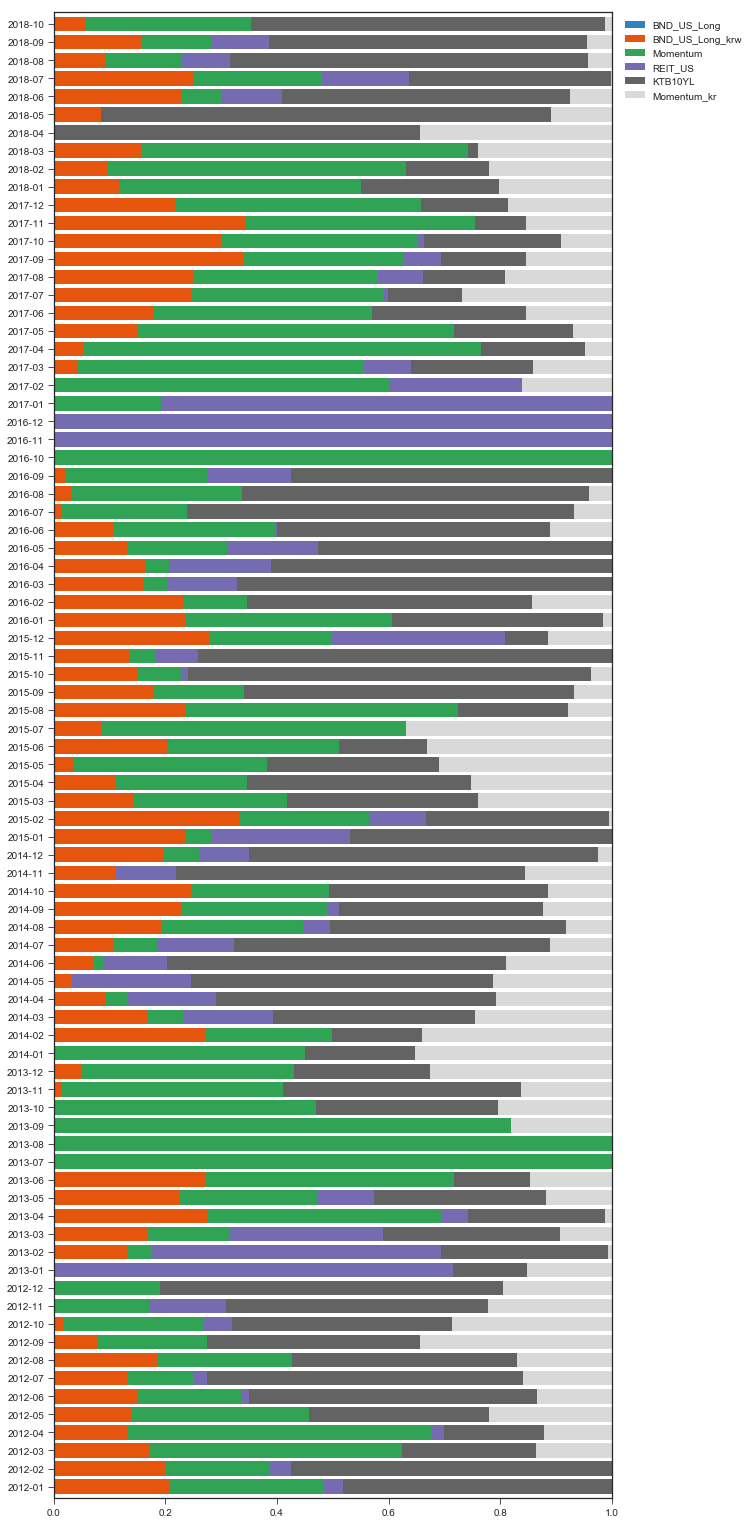

In [143]:
kuam.plot_weight([2012, 2018])

# Global equity allocation model

In [195]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    #freq='1W', 
    n_picks=10, 
    assets=setting.assets_global_eq2,  
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    trade_assets=[('BND_US_Long', {'BND_US_Long_3x':0.3, 'KTB10YL':0.3})], 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


10.280400037765503


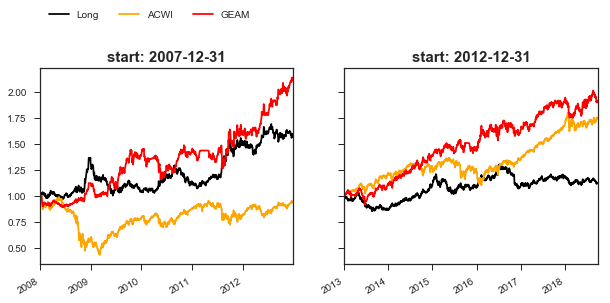

In [180]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

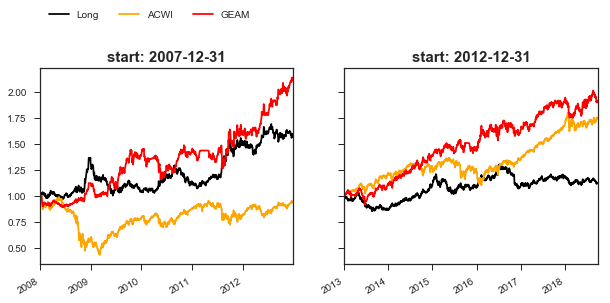

In [197]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

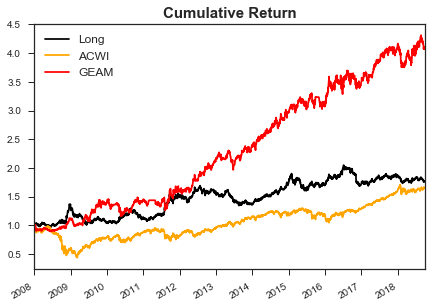

In [177]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

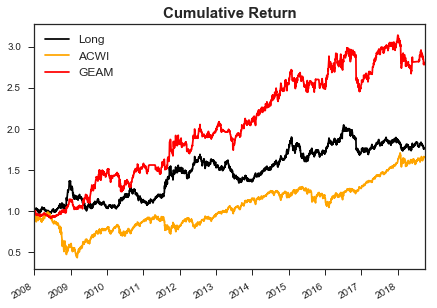

In [189]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

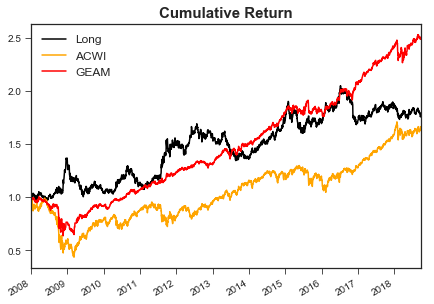

In [22]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [198]:
geam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
US_Nasdaq,4.01,2708,13.68,20.84,0.66,-49.99,20.07,16.77,1.23,0.86,10.09,63.28,1.09,76.61
Sweden,1.59,2708,4.35,32.45,0.13,-63.56,10.42,21.85,0.42,1.36,40.42,53.91,1.11,40.26
Indonesia,1.20,2708,1.70,31.21,0.05,-72.14,5.26,29.10,0.21,0.66,39.41,57.03,0.92,21.76
MiddleEast,1.10,2583,0.91,21.39,0.04,-56.38,4.81,16.74,0.29,0.52,34.45,53.28,1.00,-58.66
DualMomentum,4.09,2708,13.90,16.56,0.84,-20.23,13.69,15.10,0.93,0.17,1.75,62.50,1.29,96.73


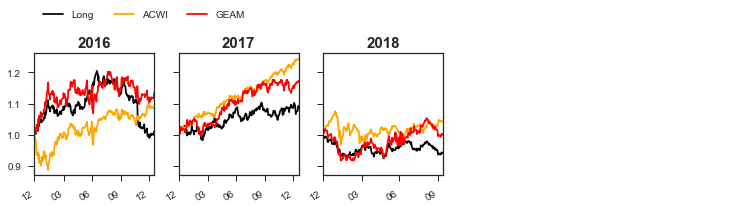

In [199]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

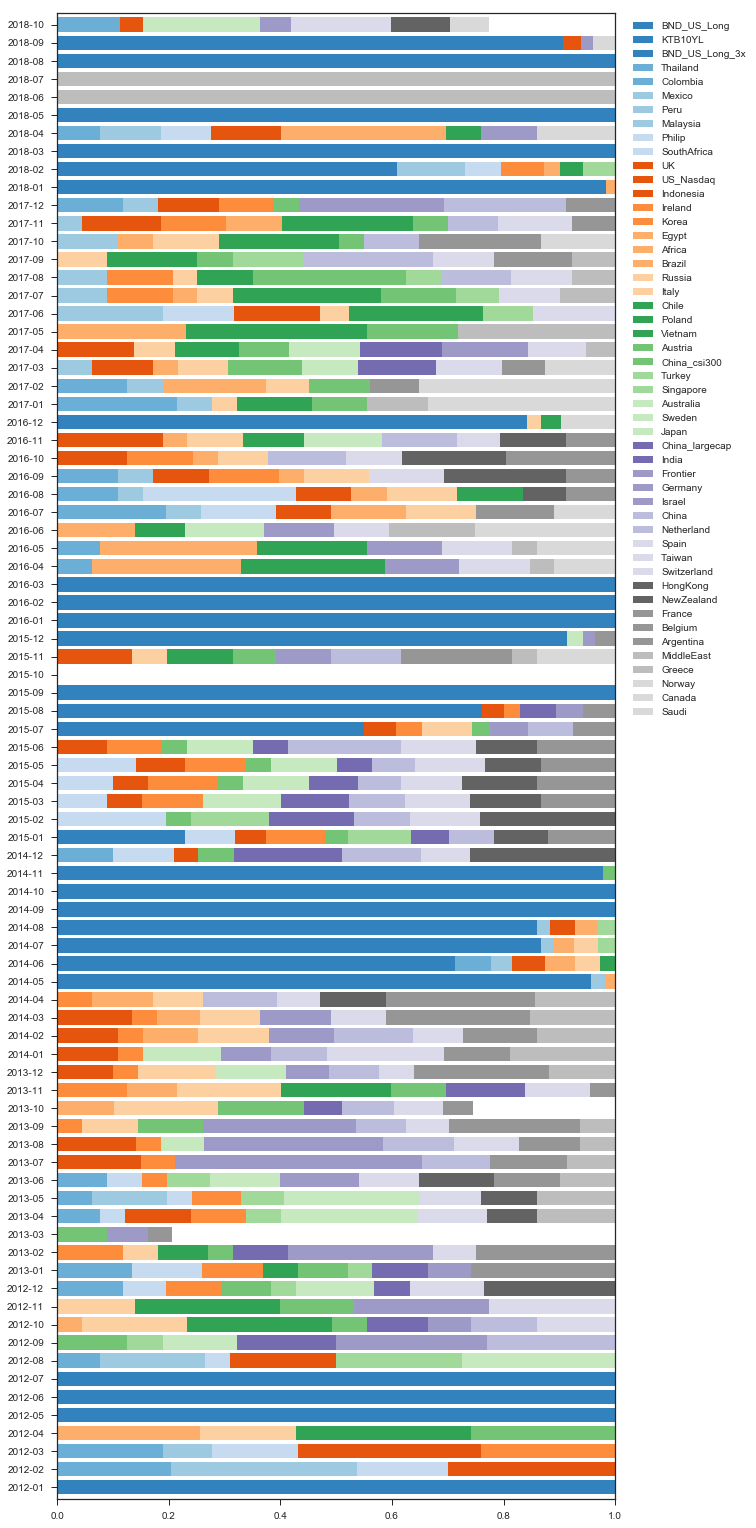

In [200]:
geam.plot_weight([2012, 2018])

# Global sector allocation model

In [176]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05,
    profitake_sigma=3, 
    rentry_sigma=2, 
)

HBox(children=(IntProgress(value=0, max=130), HTML(value='')))


40.03474569320679


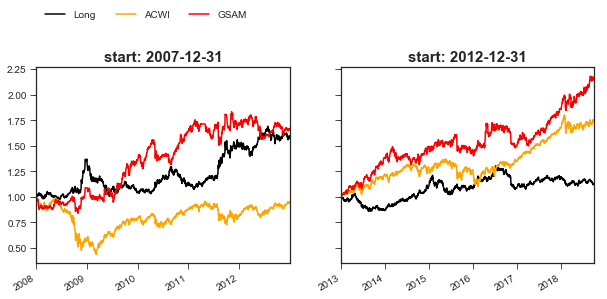

In [12]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

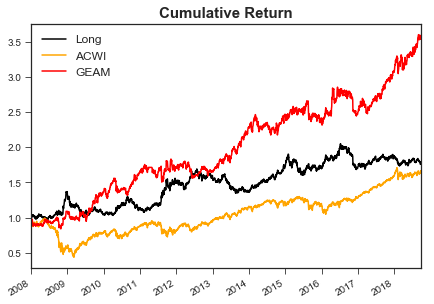

In [181]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

In [182]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
RegionalBank,1.97,2708,6.46,33.75,0.19,-63.72,11.42,23.22,0.50,1.16,23.02,58.59,0.97,25.50
CapitalMarket,1.06,2708,0.51,32.61,0.02,-72.00,9.66,21.31,0.48,1.29,35.99,58.59,0.80,-123.54
Automotive,1.40,1915,4.52,21.75,0.21,-34.96,8.34,17.99,0.45,1.08,35.05,54.44,1.10,54.02
Airlines,5.20,2708,16.45,35.05,0.47,-67.47,20.48,24.20,0.80,0.98,26.27,54.69,1.41,71.03
DualMomentum,3.59,2708,12.52,16.15,0.78,-16.62,11.95,14.62,0.75,0.31,12.48,60.94,1.25,94.23


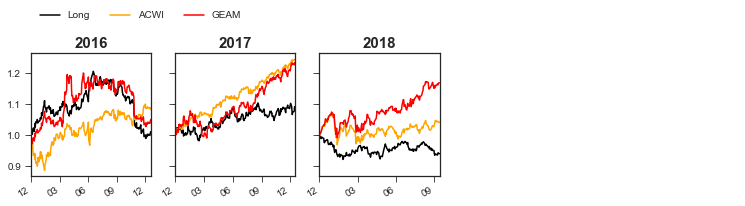

In [183]:
gsam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

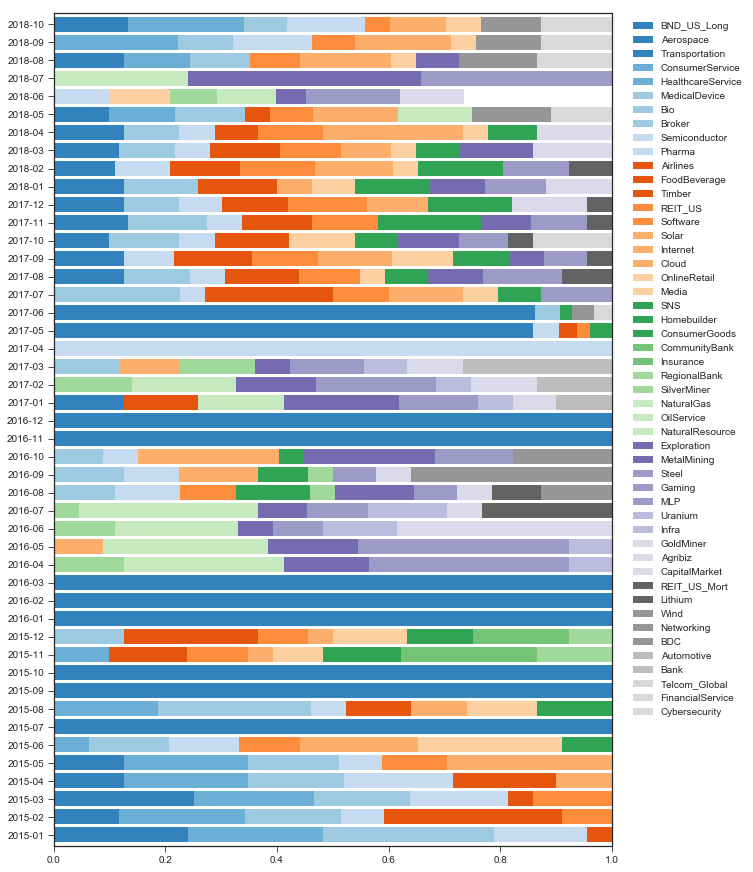

In [184]:
gsam.plot_weight([2015, 2018])

# Global bond allocation model

In [195]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
gbam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_fi, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_thres=0.1, 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(60,250), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='BND_US_Interm', #'BND_GlobalSov_loch', #'BND_US_AGG', 
    supporter='ACWI', 
    cash_equiv='BND_US_Long', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=1.05, 
    profitake_sigma=30,
    rentry_sigma=2, 
)

HBox(children=(IntProgress(value=0, max=130), HTML(value='')))


22.119494199752808


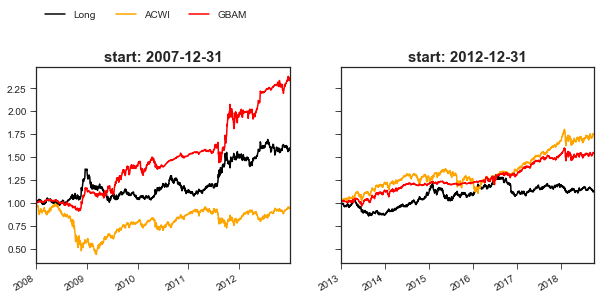

In [17]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

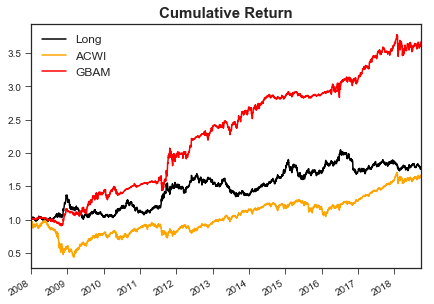

In [188]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum(strats, names=names, color=color, logy=False)

In [189]:
gbam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_HY_Muni,1.58,2708,4.32,6.97,0.62,-28.12,5.51,6.45,1.25,0.01,22.94,71.09,0.67,76.65
BND_GlobalSov_loc,1.18,2708,1.54,8.75,0.18,-16.86,1.33,7.84,0.17,0.11,40.75,57.81,0.88,10.38
BND_US_Muni,1.45,2708,3.49,5.28,0.66,-12.33,3.57,3.77,0.87,0.01,18.10,62.50,1.06,93.16
BND_US_TIP,1.38,2708,3.01,6.32,0.48,-14.57,3.06,5.33,0.67,-0.05,30.13,60.94,1.02,67.54
DualMomentum,3.65,2708,12.69,12.71,1.00,-13.35,11.71,10.51,1.08,0.25,1.83,65.62,1.47,94.16


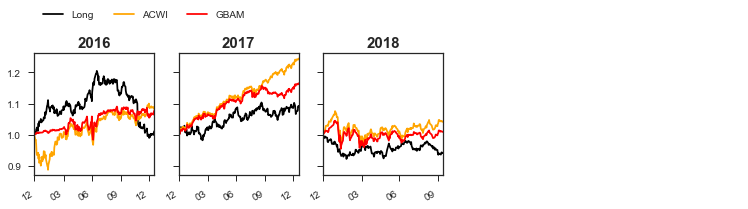

In [209]:
gbam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

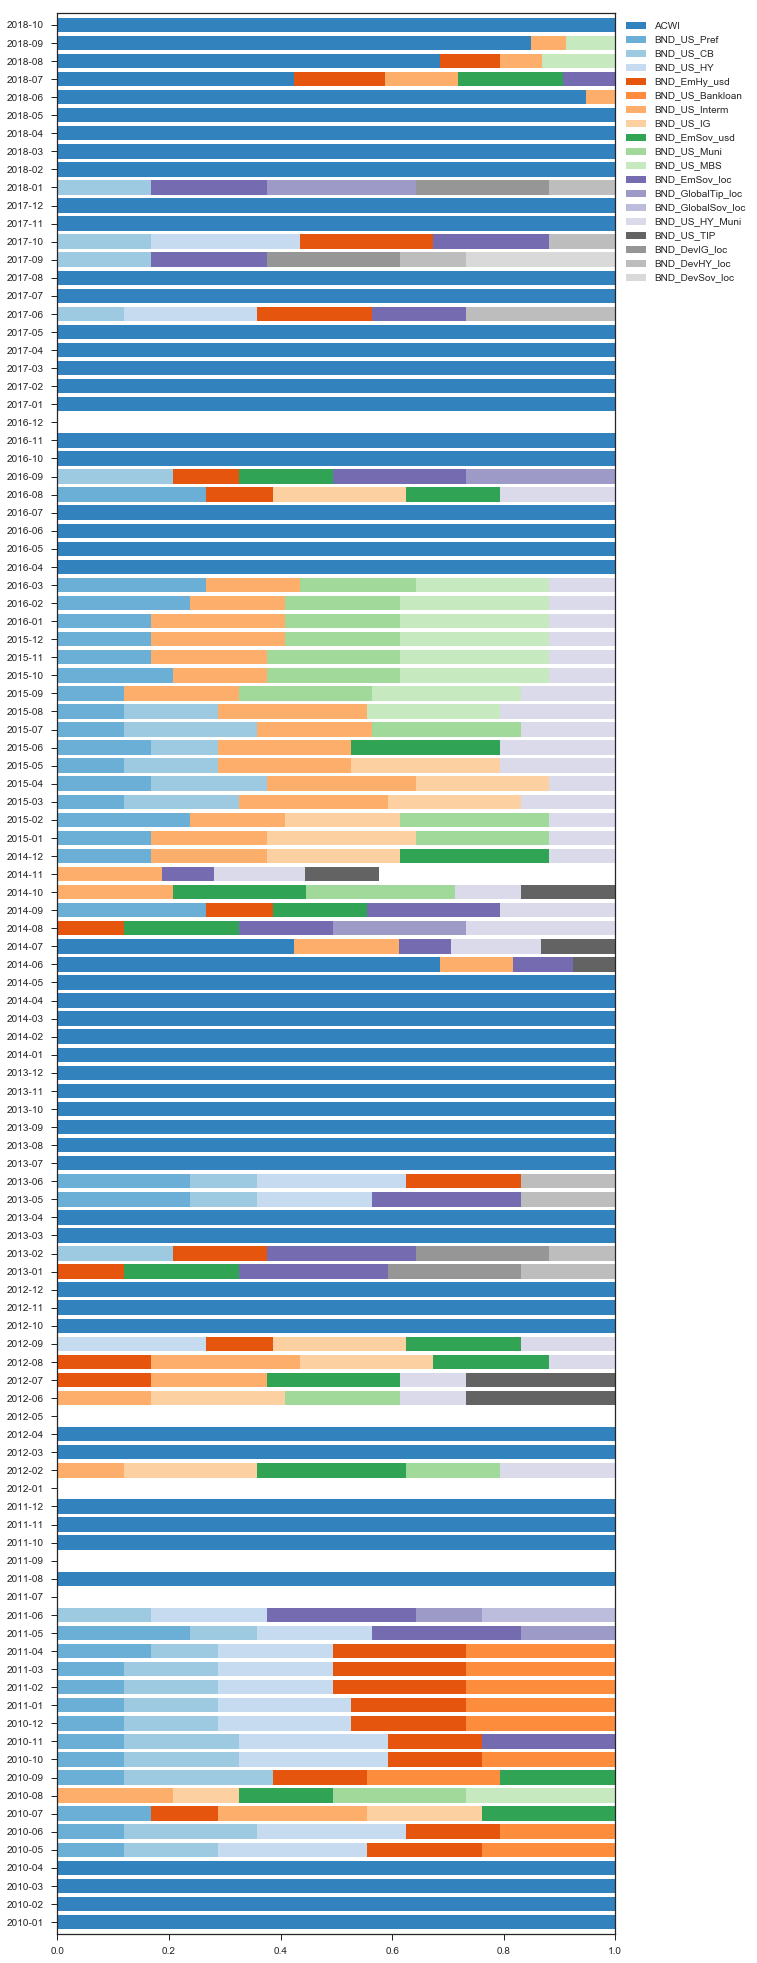

In [210]:
gbam.plot_weight([2010, 2018])

In [217]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Korea factor allocation model

In [220]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', # adaptive로 하고, 종목을 selection에서 고르면 더 잘나옴
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)

HBox(children=(IntProgress(value=0, max=130), HTML(value='')))


19.78369116783142


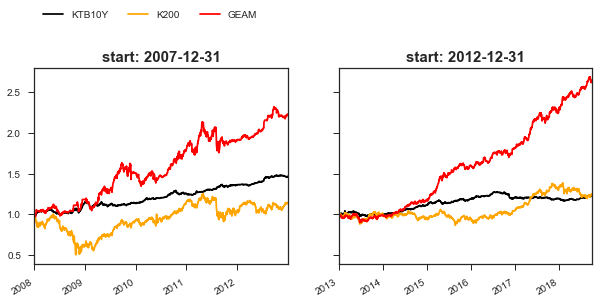

In [332]:
strats = ['KTB10Y', 'K200', 'DualMomentum']
names = ['KTB10Y', 'K200', 'GEAM']
color = ['k', 'orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

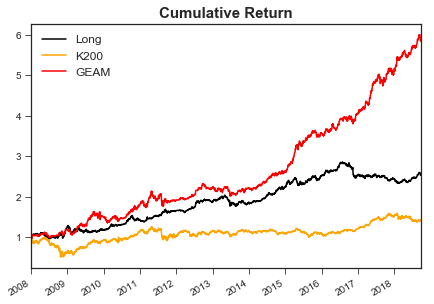

In [222]:
strats = ['KTB10YL', 'K200', 'DualMomentum']
names = ['Long', 'K200', 'GEAM']
color = ['k', 'orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)#, start='2009-12-31')

In [22]:
kfam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
K200L,0.97,2788,-0.26,38.93,-0.01,-77.03,1.25,26.43,0.04,0.55,48.21,56.25,0.91,-74.70
ESG_kr,1.34,1533,4.93,10.77,0.46,-16.82,6.02,10.05,0.59,0.19,36.37,58.57,1.11,49.51
ACWI,1.65,2788,4.62,20.87,0.22,-56.41,10.94,15.37,0.73,1.00,24.62,60.94,0.87,24.27
DvdGrowth_kr,3.40,2399,13.62,14.00,0.97,-20.05,16.90,12.53,1.33,0.20,16.88,59.63,1.48,91.82
DualMomentum,5.90,2788,17.27,12.84,1.34,-17.75,16.69,9.42,1.70,0.07,7.72,73.44,1.10,96.99


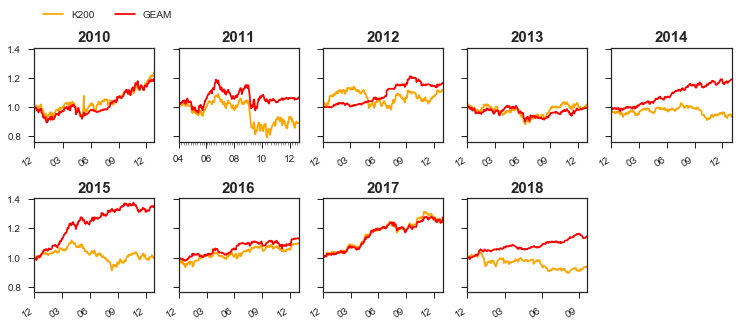

In [335]:
kfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2010))

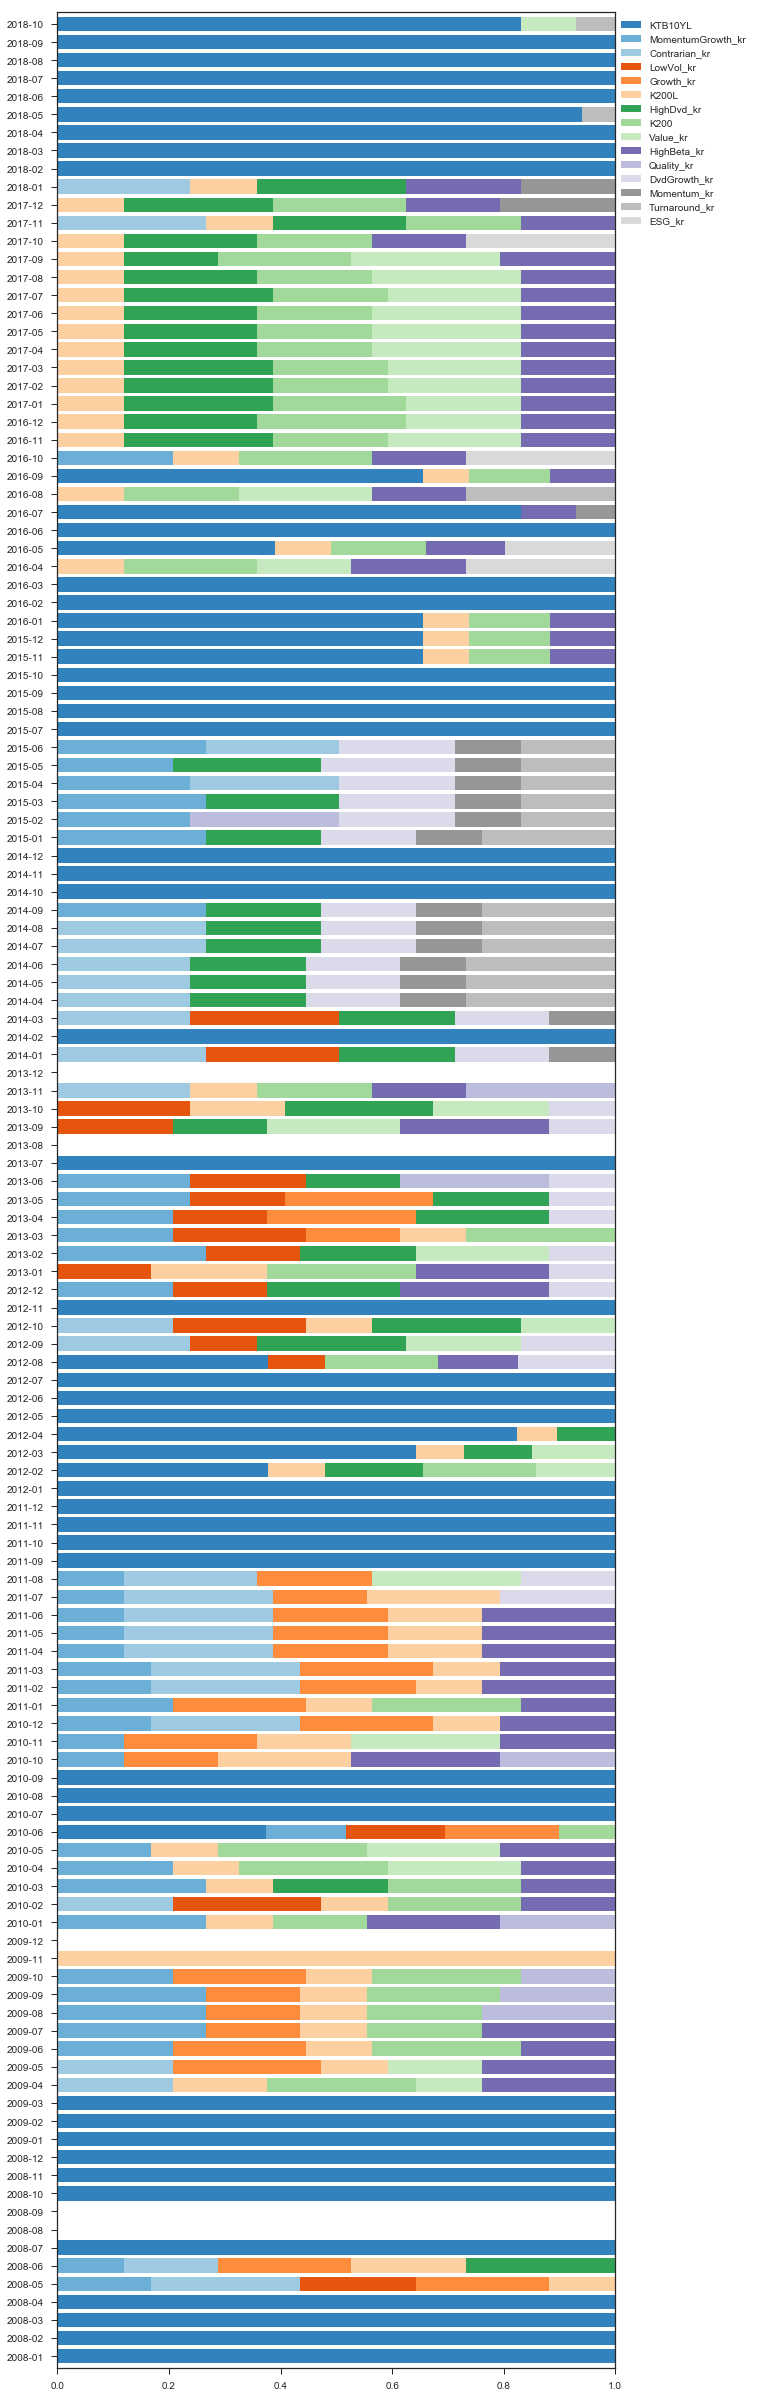

In [336]:
kfam.plot_weight([2003, 2018])

In [344]:
kfam.weight.iloc[-1]

Turnaround_kr        0.070298
HighDvd_kr           0.000000
DvdGrowth_kr         0.000000
Momentum_kr          0.000000
K200                 0.000000
ESG_kr               0.000000
Quality_kr           0.000000
MomentumGrowth_kr    0.000000
Value_kr             0.099416
Contrarian_kr        0.000000
KTB10Y               0.000000
HighBeta_kr          0.000000
LowVol_kr            0.000000
Growth_kr            0.000000
KTB10YL              0.830286
K200L                0.000000
Name: 2018-09-28 00:00:00, dtype: float64

# US multiasset model

In [235]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [242]:
umm = q.Backtester( 
    setting.base_params(db), 
    w_type='inv_ranky2', #이것도 adaptive로 하고, 종목을 selection에서 고르면 더 잘나오긴 하는데,,, 초기에 종목에 너무 쏠리는듯
    rebal_style='cum', 
    freq='1M', 
    n_picks=10, 
    assets=setting.assets_us_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_HY', 
    supporter='BND_US_Long', 
    cash_equiv= 'BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)

HBox(children=(IntProgress(value=0, max=130), HTML(value='')))


28.48410439491272


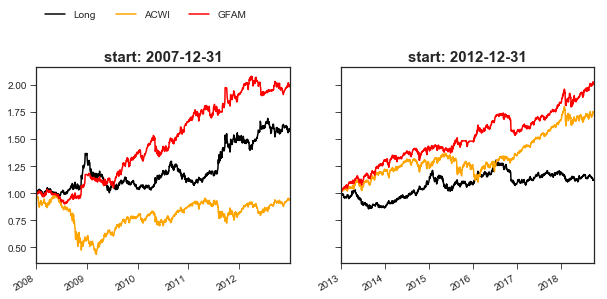

In [143]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

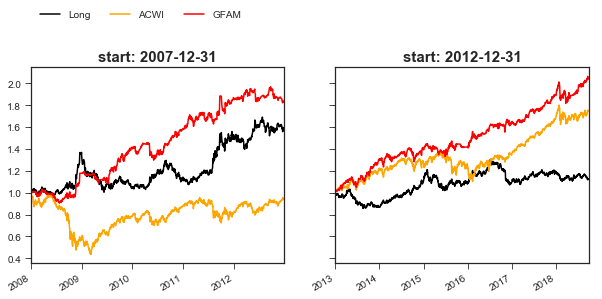

In [237]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

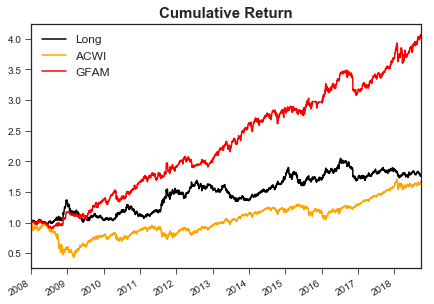

In [144]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum(strats, names=names, color=color, logy=False)

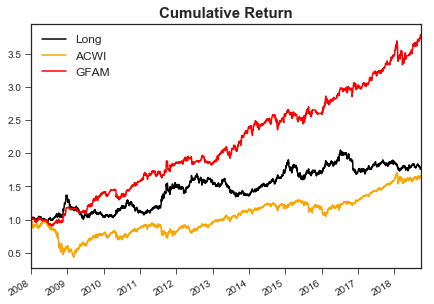

In [238]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

umm.plot_cum(strats, names=names, color=color, logy=False)

In [243]:
umm.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Moat,3.81,2708,13.15,22.41,0.59,-48.35,15.38,16.00,1.04,0.94,12.40,64.06,1.02,91.23
HighBeta,1.72,2708,5.14,36.08,0.14,-76.19,15.76,22.91,0.77,1.49,27.53,55.47,1.06,-1.34
BND_US_MBS,1.39,2708,3.09,3.42,0.90,-4.81,3.30,2.69,1.22,-0.02,16.43,67.97,1.26,77.75
Growth,2.99,2708,10.63,18.88,0.56,-47.27,16.22,14.26,1.18,0.84,9.96,64.06,1.01,69.50
DualMomentum,4.04,2708,13.75,12.38,1.11,-12.88,15.22,11.26,1.22,0.11,2.68,66.41,1.36,96.49


In [239]:
umm.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Moat,3.81,2708,13.15,22.41,0.59,-48.35,15.38,16.00,1.04,0.94,12.40,64.06,1.02,91.23
HighBeta,1.72,2708,5.14,36.08,0.14,-76.19,15.76,22.91,0.77,1.49,27.53,55.47,1.06,-1.34
BND_US_MBS,1.39,2708,3.09,3.42,0.90,-4.81,3.30,2.69,1.22,-0.02,16.43,67.97,1.26,77.75
Growth,2.99,2708,10.63,18.88,0.56,-47.27,16.22,14.26,1.18,0.84,9.96,64.06,1.01,69.50
DualMomentum,3.75,2708,12.98,10.98,1.18,-12.13,13.02,10.76,1.24,0.06,1.18,67.19,1.26,97.23


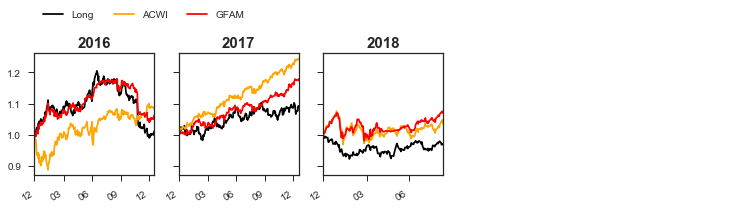

In [1007]:
umm.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

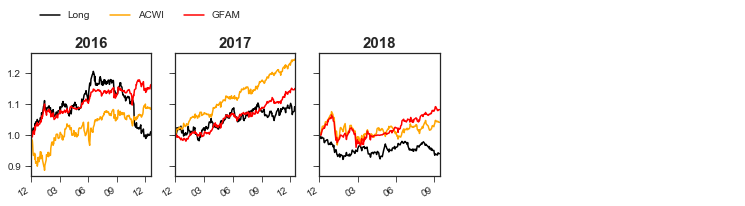

In [240]:
umm.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

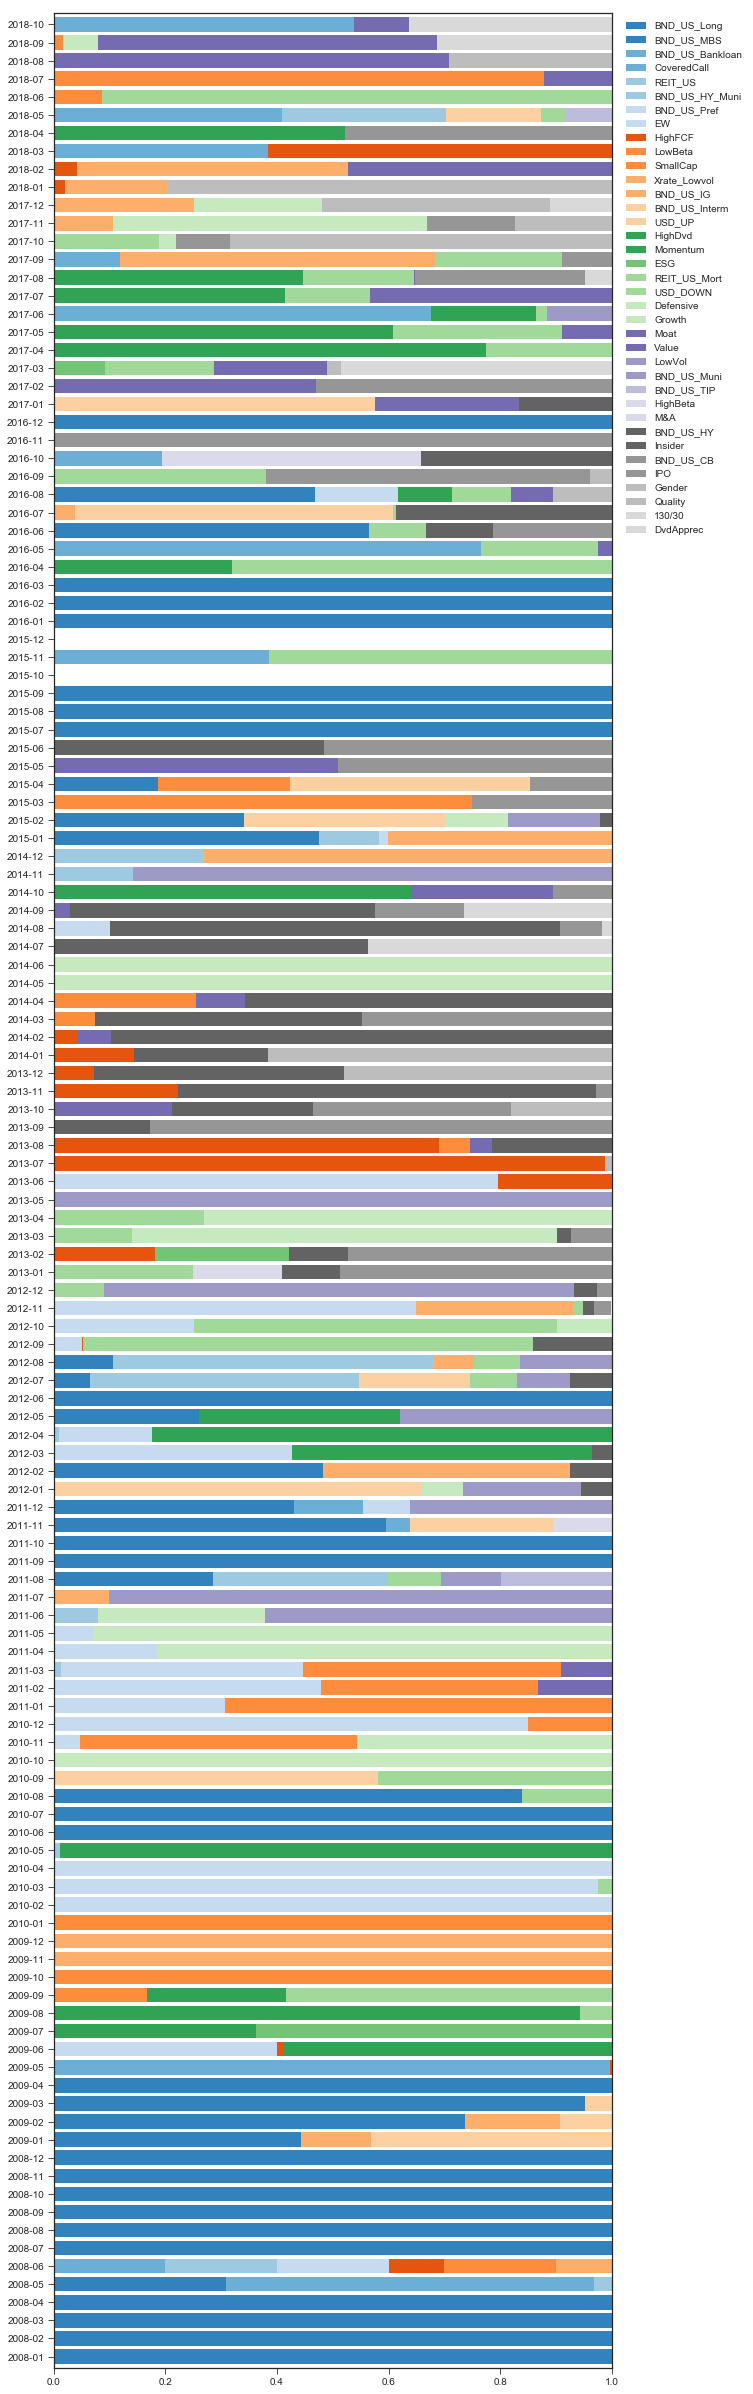

In [241]:
umm.plot_weight([2003, 2018])

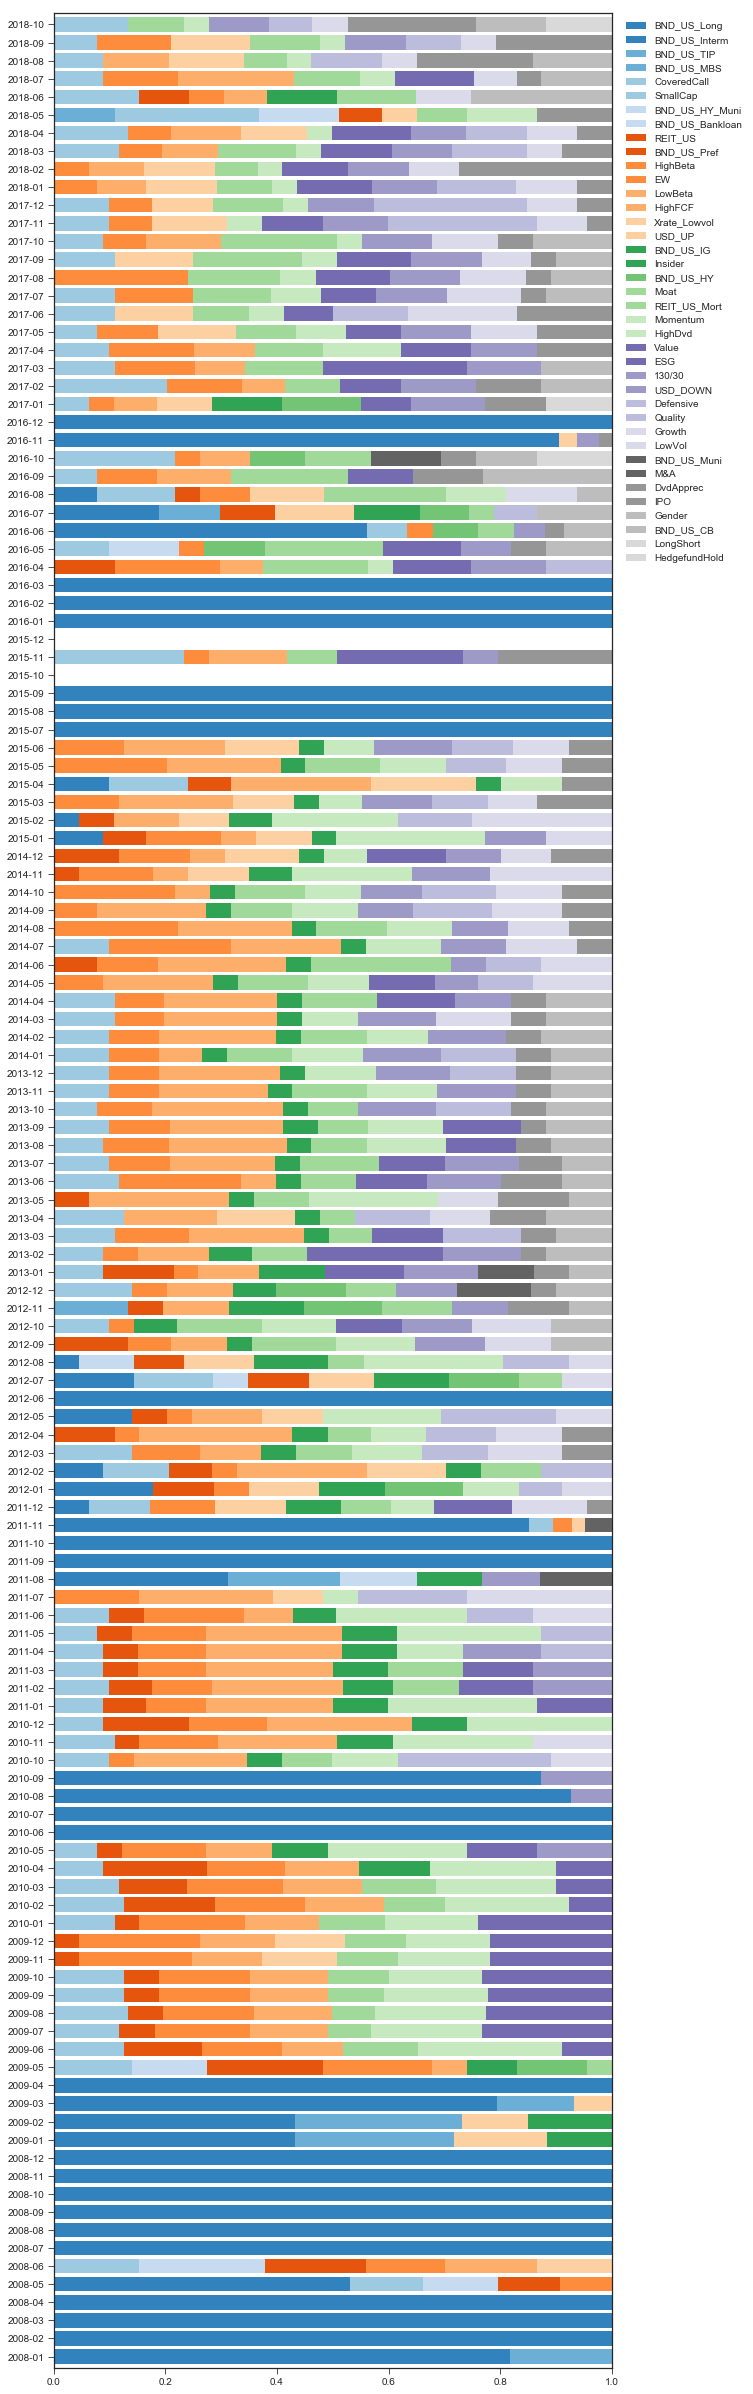

In [244]:
umm.plot_weight([2003, 2018])

# Alternatives allocation model

In [1267]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [254]:
aam = q.Backtester( 
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_alt, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_TIP', 
    supporter='BND_US_Long', 
    cash_equiv= 'BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)

HBox(children=(IntProgress(value=0, max=130), HTML(value='')))


22.668626308441162


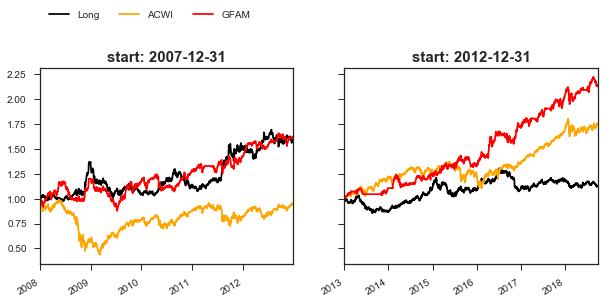

In [28]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

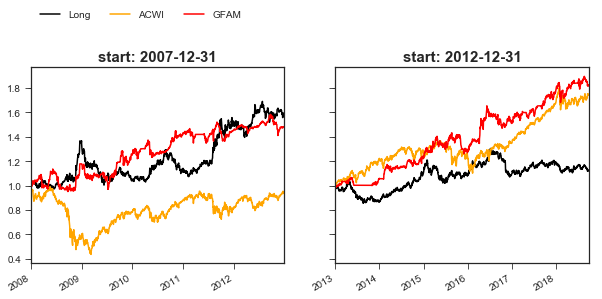

In [251]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

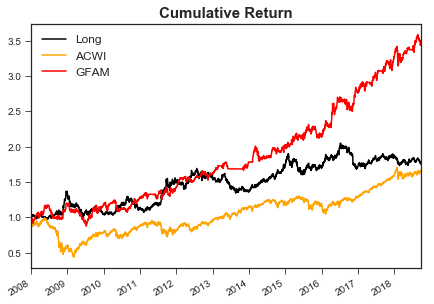

In [248]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum(strats, names=names, color=color, logy=False)

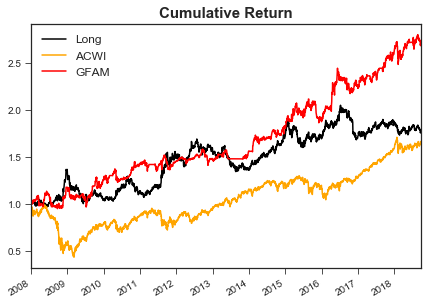

In [253]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GFAM']
color = ['k', 'orange', 'r']

aam.plot_cum(strats, names=names, color=color, logy=False)

In [29]:
aam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Gender,3.40,2079,15.85,14.84,1.07,-20.76,15.34,12.26,1.29,0.89,9.51,71.43,1.13,92.75
MLP,1.68,2708,4.90,23.30,0.21,-53.06,7.95,15.10,0.61,0.63,32.13,58.59,0.97,48.71
PE,1.13,2708,1.16,30.15,0.04,-81.25,11.89,17.76,0.71,1.21,29.20,60.94,0.77,-90.23
ACWI,1.65,2708,4.76,21.18,0.22,-56.41,11.17,15.53,0.74,1.00,25.05,60.94,0.87,24.29
DualMomentum,3.45,2708,12.11,13.82,0.88,-26.66,13.42,13.02,1.10,0.16,3.50,59.38,1.44,95.32


In [255]:
aam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Water,1.72,2708,5.15,22.05,0.23,-56.86,10.61,15.54,0.64,0.94,21.72,61.72,0.84,37.88
BaseMetal,0.78,2708,-2.30,24.51,-0.09,-59.81,-3.01,18.31,-0.16,0.57,52.99,53.91,0.88,17.53
Engy,0.52,2708,-5.79,27.09,-0.21,-83.85,-0.00,23.61,-0.00,0.63,50.02,51.56,0.88,56.24
BND_US_TIP,1.38,2708,3.01,6.32,0.48,-14.57,3.06,5.33,0.67,-0.05,30.13,60.94,1.02,67.54
DualMomentum,3.45,2708,12.11,13.82,0.88,-26.66,13.42,13.02,1.10,0.16,3.50,59.38,1.44,95.32


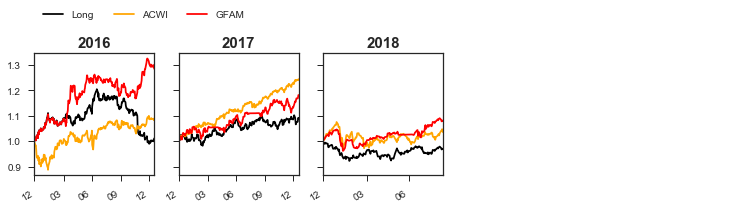

In [1274]:
aam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

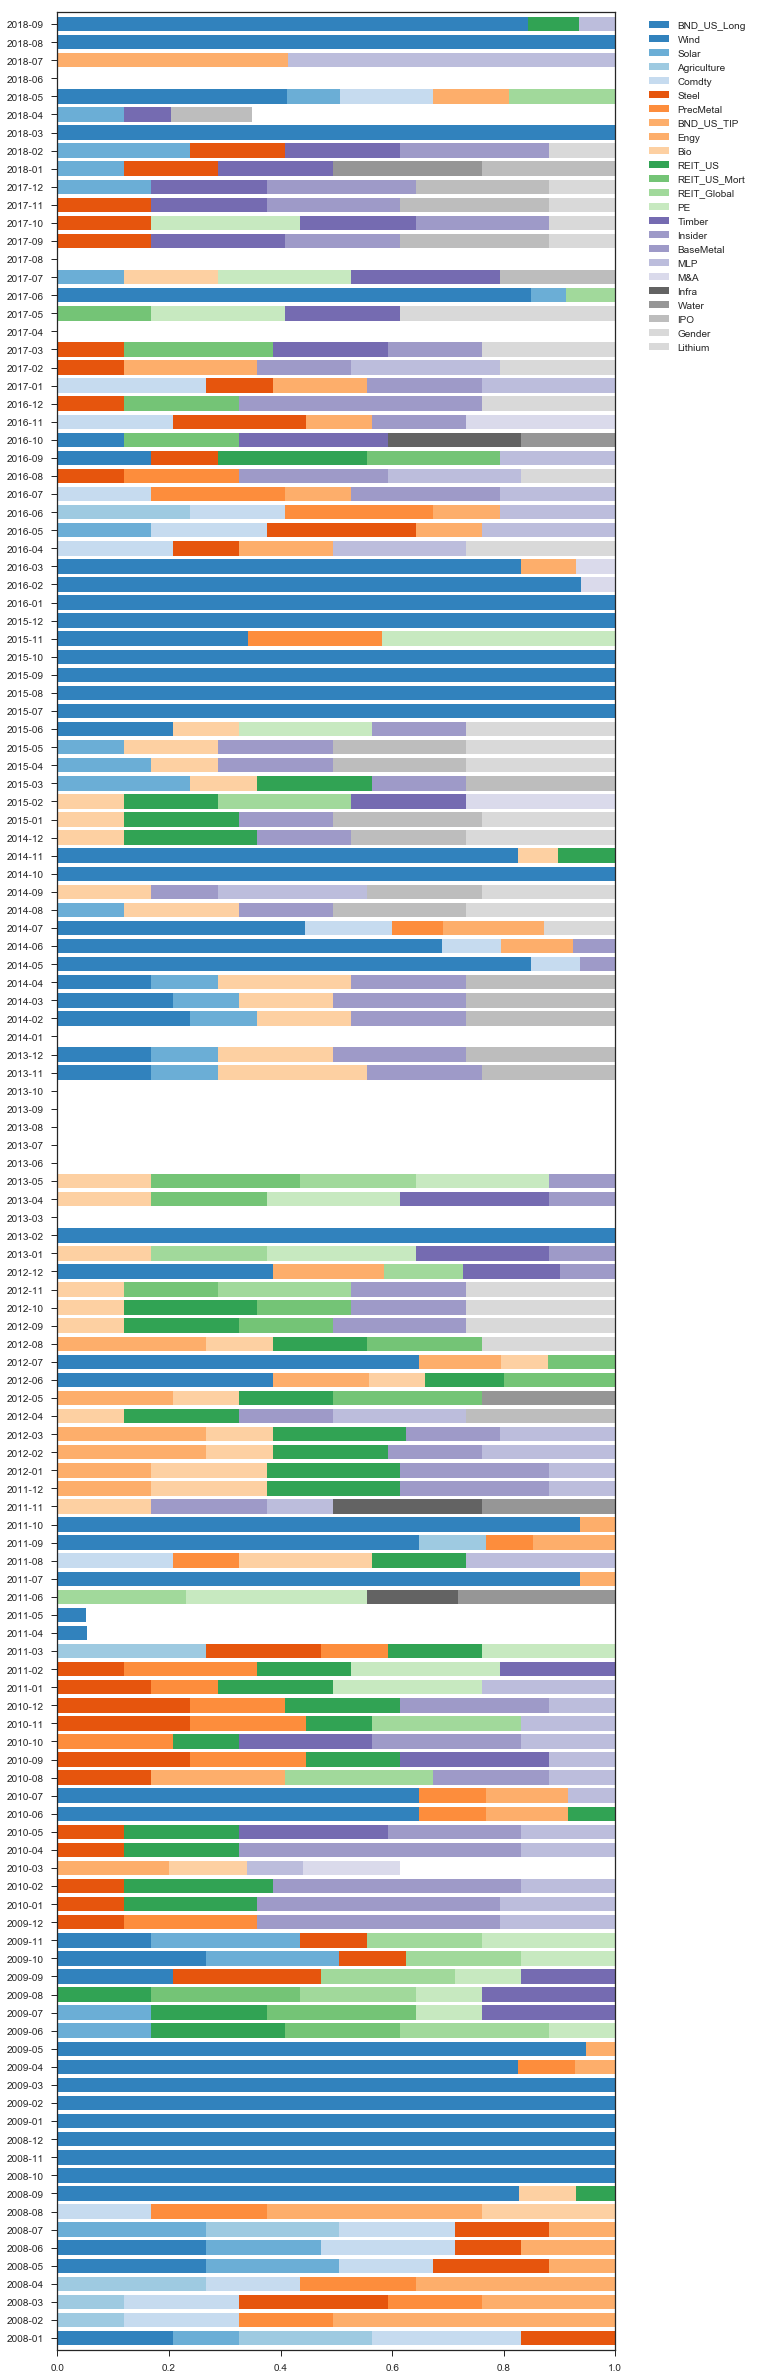

In [1275]:
aam.plot_weight([2003, 2018])

In [139]:
aam.cum.DualMomentum.pct_change()

2007-12-31         NaN
2008-01-02   -0.000990
2008-01-03    0.008404
2008-01-04   -0.013292
2008-01-07   -0.024981
2008-01-08    0.004965
2008-01-09   -0.008953
2008-01-10   -0.002489
2008-01-11    0.013196
2008-01-14    0.008311
2008-01-15   -0.015949
2008-01-16   -0.018732
2008-01-17   -0.013137
2008-01-18   -0.001026
2008-01-22   -0.013809
2008-01-23   -0.008927
2008-01-24    0.026543
2008-01-25    0.012677
2008-01-28    0.002975
2008-01-29    0.006806
2008-01-30   -0.003495
2008-01-31    0.002214
2008-02-01    0.007564
2008-02-04    0.005485
2008-02-05   -0.007043
2008-02-06    0.000114
2008-02-07    0.002723
2008-02-08    0.022843
2008-02-11    0.009836
2008-02-12   -0.010709
                ...   
2018-07-23    0.002181
2018-07-24    0.000618
2018-07-25    0.006019
2018-07-26    0.003488
2018-07-27   -0.006129
2018-07-30    0.004837
2018-07-31    0.001649
2018-08-01   -0.003080
2018-08-02    0.000605
2018-08-03    0.002099
2018-08-06    0.000248
2018-08-07   -0.002201
2018-08-08 

In [103]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [256]:
mix = q_base.BacktestComparator(setting.base_params(db), gmm=gmm, umm=umm, gsam=gsam, gbam=gbam, kfam=kfam, aam=aam, kuam=kuam)
mix.mix('sharpe_parity')
#mix.mix('semi_sharpe_parity', w_min=0.1)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

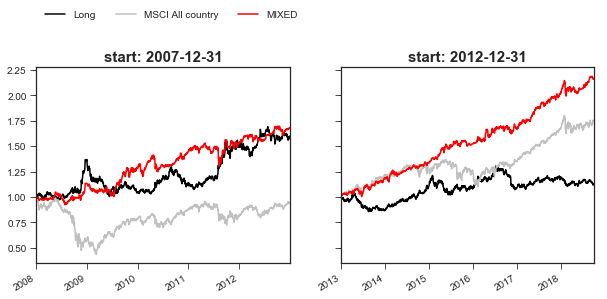

In [72]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

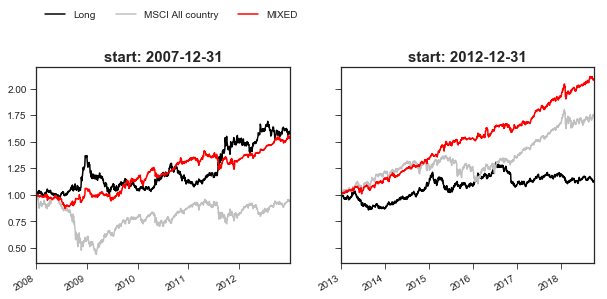

In [258]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

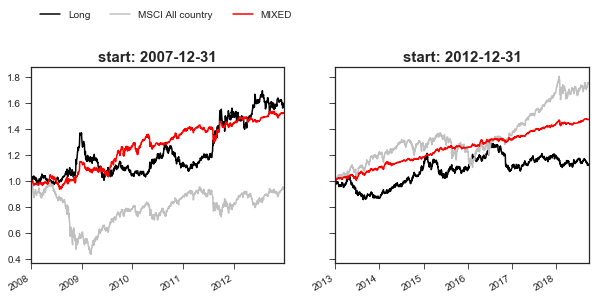

In [91]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

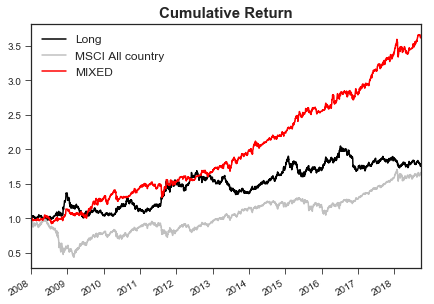

In [74]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)#, start='2010-12-31')

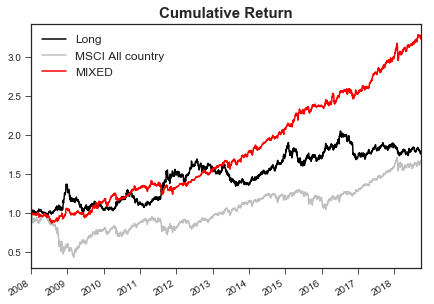

In [259]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)#, start='2010-12-31')

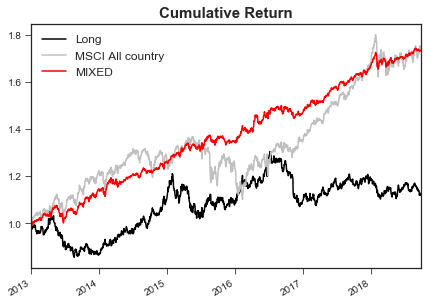

In [11]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

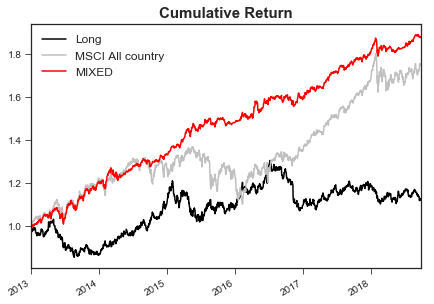

In [79]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

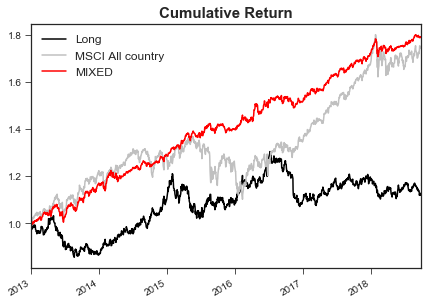

In [89]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

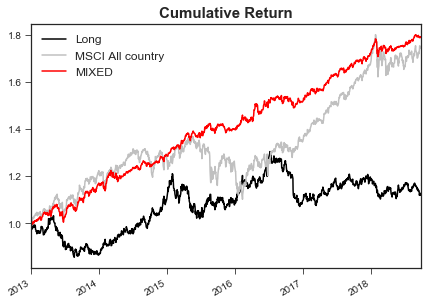

In [102]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

In [82]:
mix.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
gsam,3.59,2708,12.52,16.15,0.78,-16.62,11.95,14.62,0.75,0.31,12.48,60.94,1.25,94.23
gbam,3.65,2708,12.69,12.71,1.00,-13.35,11.71,10.51,1.08,0.25,1.83,65.62,1.47,94.16
kfam,5.90,2708,17.82,13.12,1.36,-17.75,17.59,9.59,1.74,0.07,7.12,73.44,1.08,97.01
aam,3.49,2708,12.24,13.82,0.89,-26.54,13.27,13.02,1.10,0.16,3.74,59.38,1.43,95.09
mixed,3.64,2708,12.67,10.91,1.16,-14.77,13.16,9.17,1.37,0.17,0.00,68.75,1.25,98.47


In [28]:
mix.get_stats().tail(7)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
gmm,1.65,1449,9.02,7.80,1.16,-8.51,10.15,8.04,1.30,0.22,0.00,60.29,2.00,98.18
umm,1.71,1449,9.69,7.76,1.25,-7.86,8.40,7.86,1.11,0.33,4.58,69.12,1.48,73.46
gsam,1.83,1449,10.96,9.86,1.11,-9.54,7.44,9.99,0.73,0.46,11.58,64.71,1.45,53.69
gbam,1.43,1449,6.36,7.35,0.86,-8.27,7.06,7.53,0.96,0.41,3.00,69.12,1.14,93.80
kfam,1.99,1449,12.64,7.09,1.78,-10.69,14.82,5.87,2.43,0.04,0.58,77.94,1.25,91.97
aam,1.79,1449,10.56,8.60,1.23,-9.08,10.88,9.36,1.33,0.20,0.00,61.76,1.94,97.95
mixed,1.74,1449,9.99,5.92,1.69,-6.92,9.99,5.83,1.70,0.28,0.00,72.06,1.57,97.89


In [78]:
mix.get_stats().tail(7)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
gmm,1.65,1449,9.02,7.80,1.16,-8.51,10.15,8.04,1.30,0.22,0.00,60.29,2.00,98.18
umm,1.71,1449,9.69,7.76,1.25,-7.86,8.40,7.86,1.11,0.33,4.58,69.12,1.48,73.46
gsam,1.83,1449,10.96,9.86,1.11,-9.54,7.44,9.99,0.73,0.46,11.58,64.71,1.45,53.69
gbam,1.43,1449,6.36,7.35,0.86,-8.27,7.06,7.53,0.96,0.41,3.00,69.12,1.14,93.80
kfam,1.99,1449,12.64,7.09,1.78,-10.69,14.82,5.87,2.43,0.04,0.58,77.94,1.25,91.97
aam,1.79,1449,10.56,8.60,1.23,-9.08,10.88,9.36,1.33,0.20,0.00,61.76,1.94,97.95
mixed,1.88,1449,11.52,6.37,1.81,-7.09,10.80,5.51,1.83,0.28,0.00,75.00,1.52,93.91


In [110]:
mix.get_stats().tail(7)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
gmm,1.65,1449,9.02,7.80,1.16,-8.51,10.15,8.04,1.30,0.22,0.00,60.29,2.00,98.18
umm,1.71,1449,9.69,7.76,1.25,-7.86,8.40,7.86,1.11,0.33,4.58,69.12,1.48,73.46
gsam,1.83,1449,10.96,9.86,1.11,-9.54,7.44,9.99,0.73,0.46,11.58,64.71,1.45,53.69
gbam,1.43,1449,6.36,7.35,0.86,-8.27,7.06,7.53,0.96,0.41,3.00,69.12,1.14,93.80
kfam,1.99,1449,12.64,7.09,1.78,-10.69,14.82,5.87,2.43,0.04,0.58,77.94,1.25,91.97
aam,1.79,1449,10.56,8.60,1.23,-9.08,10.88,9.36,1.33,0.20,0.00,61.76,1.94,97.95
mixed,1.88,1449,11.52,6.37,1.81,-7.09,10.80,5.51,1.83,0.28,0.00,75.00,1.52,93.91


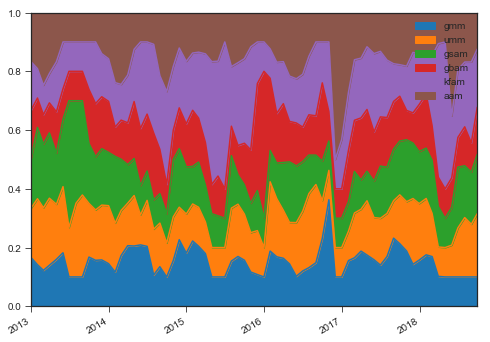

In [108]:
alloc = mix.alloc
xlim = (alloc.index[0], alloc.index[-1])
ax = alloc.plot.area(figsize=(8,6), xlim=xlim, ylim=(0,1), legend=True)#, color=['orange','gold','pink','brown'])
#ax.legend(['AAM','GEAM','GFAM','KFAM'], bbox_to_anchor=(0,1,1,0), ncol=5, loc=3, fontsize=13)

In [112]:
mix.cum.mixed.rolling(250).apply(lambda x: x[-1]-x[0], raw=True).median()

0.14724024094631516

In [91]:
rt = mix.cum.mixed.resample('M').ffill().pct_change()#.plot.bar()
rt[rt<-0.05]

Series([], Freq: M, Name: mixed, dtype: float64)

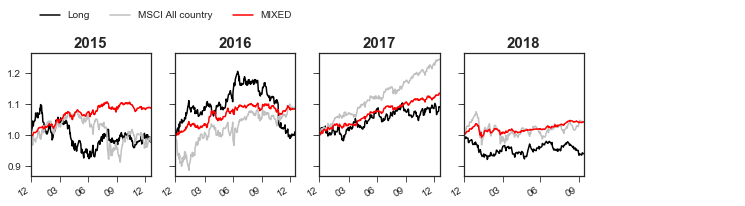

In [90]:
mix.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2015))

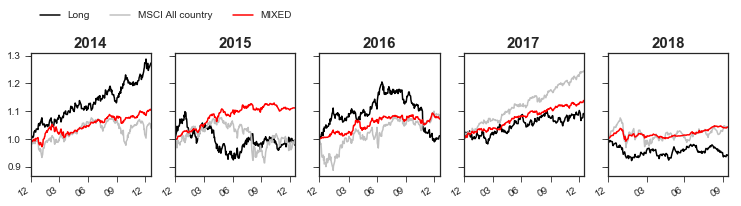

In [114]:
mix.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2014))

In [114]:
pd.Series([1,2,3]).to_frame().rank()[0]

0    1.0
1    2.0
2    3.0
Name: 0, dtype: float64

In [ ]:
bts = {}
for asset in setting.assets_global_eq:
    assets = {asset} | {'REIT_Global'}
    
    bt = q.Backtester(
        setting.base_params(db), 
        w_type='ew', 
        #iv_period=60, 
        rebal_style='cum', 
        #freq='1W', 
        n_picks=1, 
        assets=assets, 
        sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
        sig_w_dynamic=False, 
        sig_dyn_fwd=21*np.array([1]), 
        #sig_dyn_m_backs=24, 
        follow_trend=None, #(20,60), 
        follow_trend_market=(20,60), 
        follow_trend_supporter=(60,250), 
        strong_condition=True, 
        market=None, #'ACWI', 
        supporter='BND_US_Long', 
        cash_equiv='BND_US_Tbill', 
        #trade_assets=[('US', {'US_lev':0.5})], 
        start='2007-12-31', 
        end='2018-09-30', 
        losscut=1.05, 
        profitake_sigma=30, 
        rentry_sigma=2, 
    )
    bts[asset+'1'] = bt

In [38]:
from scipy.optimize import minimize

vol_factor = 2
rt = geam.p_close[['US','BND_US_Long']].iloc[:-2530].iloc[-60:].pct_change()
expr = rt.mean()
cov = rt.cov()
obj = lambda w: -w.dot(expr) / ((w.dot(cov.dot(w))**0.5)**vol_factor)
iv = [0.5, 0.5]
cons_budget_min = [{'type':'ineq', 'fun':lambda w: w.sum() - 0.0}]
cons_budget_max = [{'type':'ineq', 'fun':lambda w: 1.0 - w.sum()}]
cons_budget = [{'type':'eq', 'fun':lambda w: 1.0 - w.sum()}]
cons = cons_budget_min + cons_budget_max
bnds = list(zip([0.01]*2, [1.0]*2))

result = minimize(obj, iv, method='SLSQP', bounds=bnds, constraints=cons)#, options=opt)
result

     fun: -1048.4288424058634
     jac: array([1.04841649e+05, 5.36376953e-01])
 message: 'Optimization terminated successfully.'
    nfev: 100
     nit: 20
    njev: 18
  status: 0
 success: True
       x: array([0.01      , 0.02494116])

In [33]:
expr/(np.diag(cov)**0.5)

US             0.148202
BND_US_Long    0.114808
dtype: float64

In [34]:
-obj(result.x)

0.20202040249859995